In [5]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# from final_project.loader import get_df
from final_project import loader, builder, models, plots
# from final_project import builder
# from final_project import models
from final_project.models import ModelENUM
from pathlib import Path
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
df = loader.get_df(year=2018)

# for c in df.columns:
#     print(c)
df = df[df['Origin'] == 'BOS']

df = df[[
    'DistanceGroup',
    'DayofMonth',
    'Month',
    'Year',
    'Duplicate',
    'ArrDel15',
    'DistanceGroup',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay',
    'Operating_Airline',
    'Dest'
]]
df = builder.encodeFrame(df)
x = df.drop(columns=['ArrDel15'])
y = df[['ArrDel15']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=150)

FileSourceEnum.NOTEBOOK
/home/drumblum/Northeastern/cs6140/CS6140-final-project/res


In [18]:
print(df)

         DistanceGroup  ArrDel15  DistanceGroup  WeatherDelay  NASDelay  \
726                  6       0.0              6           0.0       0.0   
727                  6       0.0              6           0.0       0.0   
728                  6       0.0              6           0.0       0.0   
729                  6       1.0              6           0.0      15.0   
730                  6       0.0              6           0.0       0.0   
...                ...       ...            ...           ...       ...   
5681997              2       0.0              2           0.0       0.0   
5682040             11       0.0             11           0.0       0.0   
5682045              1       0.0              1           0.0       0.0   
5682050              8       0.0              8           0.0       0.0   
5682091              7       0.0              7           0.0       0.0   

         SecurityDelay  date_sin  date_cos  month_sin  month_cos  ...  \
726                0.0  0.

In [3]:
lr_pipeline = models.get_pipeline(ModelENUM.LR)
param_grid = [
    # models.log_reg.get_lr_param(solver="liblinear", penalty=["l1", "l2"], c_list=[1, 10]),
    # models.log_reg.get_lr_param(solver="saga", penalty=["l2", "elasticnet"], c_list=[1,10]),
    models.get_lr_param(penalty=["l1", "l2"], c_list=[.1, 1], max_iter=[500]),
 #    # models.get_lr_param(solver="saga", penalty=["l2"], c_list=[.1]),
]
grid_search = models.get_grid_search_cv(
    pipeline=lr_pipeline, param_grid=param_grid, cv=3, n_jobs=20
)

In [4]:
logreg_model = grid_search.fit(x_train, y_train.to_numpy().ravel())

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear
[CV 1/3; 3/4] START lr__C=1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear
[CV 1/3; 4/4] START lr__C=1, lr__max_iter=500, lr__penalty=l2, lr__solver=liblinear
[CV 3/3; 1/4] START lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear
[CV 2/3; 2/4] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=liblinear
[CV 3/3; 3/4] START lr__C=1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear
[CV 2/3; 1/4] START lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear
[CV 1/3; 2/4] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=liblinear
[CV 3/3; 4/4] START lr__C=1, lr__max_iter=500, lr__penalty=l2, lr__solver=liblinear
[CV 3/3; 2/4] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=liblinear
[CV 2/3; 4/4] START lr__C=1, lr__max_iter=500, lr__penalty=l2, lr__solver=liblinear
[CV 

/home/drumblum/Northeastern/cs6140/CS6140-final-project/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3; 3/4] END lr__C=1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear;, score=0.709 total time= 3.0min


/home/drumblum/Northeastern/cs6140/CS6140-final-project/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3; 3/4] END lr__C=1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear;, score=0.706 total time= 3.0min


/home/drumblum/Northeastern/cs6140/CS6140-final-project/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3; 3/4] END lr__C=1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear;, score=0.710 total time= 3.0min


/home/drumblum/Northeastern/cs6140/CS6140-final-project/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3; 1/4] END lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear;, score=0.709 total time= 3.2min


/home/drumblum/Northeastern/cs6140/CS6140-final-project/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3; 1/4] END lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear;, score=0.710 total time= 3.2min


/home/drumblum/Northeastern/cs6140/CS6140-final-project/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3; 1/4] END lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=liblinear;, score=0.706 total time= 3.3min


In [5]:
params = models.get_best_params(ModelENUM.LR, logreg_model)
print(params)
models.save_model(ModelENUM.LR, logreg_model)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}


In [6]:
import joblib
new_model = joblib.load(Path.cwd().parent / "models" / "LR_liblinear_l2_C1.pkl")
y_pred = new_model.predict(x_test)
y_pred_og = logreg_model.predict(x_test)
print(y_pred)
print(y_pred_og)
print(new_model.score(x_test, y_test))

[0. 0. 1. ... 1. 0. 0.]
[0. 0. 1. ... 1. 0. 0.]
0.9245988000585337


In [7]:
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc
logloss = log_loss(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print(logloss)
print(auc_roc)

2.717734715813731
0.802246443557466


In [8]:
# import matplotlib.pyplot as plt

# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')  # plot random curve
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic (ROC) curve')
# plt.legend(loc="lower right")
# plt.show()

In [9]:
models.analyze_model(new_model, x_test, x_train, y_test, y_train)

Test accuracy: 0.9245988000585337
Train accuracy: 0.9264396354297505
Precision: 1.0
Recall: 0.604492887114932
F-Beta Score: 0.7535002391963005
F1 Score: 0.7535002391963005


19542


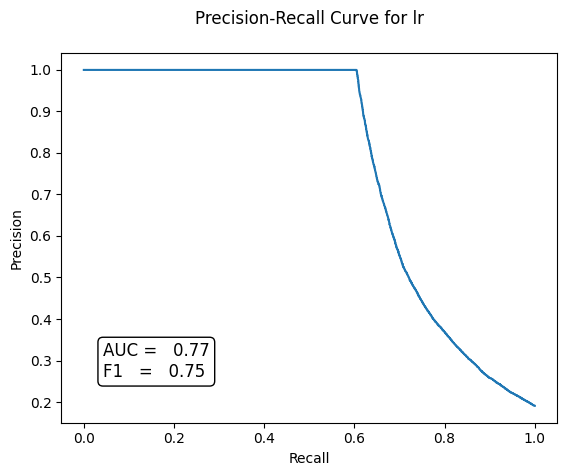

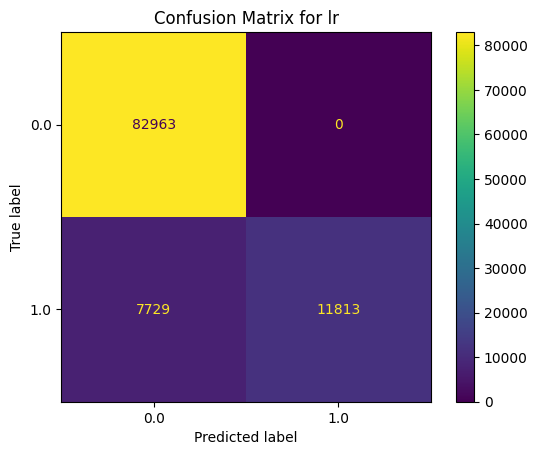

In [10]:
import numpy as np
number_true = np.count_nonzero(y_test == 1)
print(number_true)

y_prob = new_model.predict_proba(x_test)[:, 1]
y_pred = new_model.predict(x_test)
plots.save_precision_recall_curve("lr", "test_file", y_test, y_prob)
plots.save_confusion_matrix("lr", "test_file", y_test, y_pred)

In [11]:
delay_df = df[df['ArrDel15'] > 0.5].sample(n=2000)
ontime_df = df[df['ArrDel15'] <= 0.5].sample(n=8000)
fake_df = pd.concat([delay_df, ontime_df], ignore_index=True)

x = fake_df.drop(columns=['ArrDel15'])
y = fake_df[['ArrDel15']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=150)

In [17]:
svm_pipeline = models.get_pipeline(ModelENUM.SVM)
param_grid = [
    models.get_svm_param(gamma=[2, 3, 4], c_list=[1e-2, 1e-1, 1], coef0=[0, 1], kernel=['linear', 'poly'])
]
grid_search = models.get_grid_search_cv(
    pipeline=svm_pipeline, param_grid=param_grid, cv=2, n_jobs=20
)

ValueError: ModelENUM value ModelENUM.SVM has not been accounted for

In [13]:
print(x.shape)
print(y.shape)

(10000, 121)
(10000, 1)


In [14]:
svm_model = grid_search.fit(x_train, y_train.to_numpy().ravel())

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2; 5/36] START svm__C=0.01, svm__coef0=0, svm__gamma=4, svm__kernel=linear
[CV 2/2; 5/36] START svm__C=0.01, svm__coef0=0, svm__gamma=4, svm__kernel=linear
[CV 1/2; 6/36] START svm__C=0.01, svm__coef0=0, svm__gamma=4, svm__kernel=poly..
[CV 2/2; 6/36] START svm__C=0.01, svm__coef0=0, svm__gamma=4, svm__kernel=poly..
[CV 1/2; 7/36] START svm__C=0.01, svm__coef0=1, svm__gamma=2, svm__kernel=linear
[CV 2/2; 7/36] START svm__C=0.01, svm__coef0=1, svm__gamma=2, svm__kernel=linear
[CV 1/2; 8/36] START svm__C=0.01, svm__coef0=1, svm__gamma=2, svm__kernel=poly..
[CV 2/2; 8/36] START svm__C=0.01, svm__coef0=1, svm__gamma=2, svm__kernel=poly..
[CV 1/2; 9/36] START svm__C=0.01, svm__coef0=1, svm__gamma=3, svm__kernel=linear
[CV 2/2; 9/36] START svm__C=0.01, svm__coef0=1, svm__gamma=3, svm__kernel=linear
[CV 1/2; 10/36] START svm__C=0.01, svm__coef0=1, svm__gamma=3, svm__kernel=poly.
[CV 2/2; 10/36] START svm__C=0.01, svm__coef0=1,

In [15]:
# models.analyze_model(svm_model, x_test, x_train, y_test, y_train)
print(models.get_best_params(models.ModelENUM.SVM, svm_model))

{'gamma': 2, 'kernel': 'linear', 'C': 1}


In [16]:
number_true = np.count_nonzero(y_test == 1)
print(number_true)

y_prob = svm_model.predict_proba(x_test)[:, 1]
y_pred = svm_model.predict(x_test)
plots.save_precision_recall_curve("lr", "test_file", y_test, y_prob)
plots.save_confusion_matrix("lr", "test_file", y_test, y_pred)

414


AttributeError: predict_proba is not available when  probability=False